In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cosine
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/lenta-ru-news.csv', parse_dates=['date'],
                 dtype={'url': object, 'title': object, 'text': object, 'topic': object, 'tags': object})

In [3]:
df.head()

,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


In [4]:
df.shape

(800975, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800975 entries, 0 to 800974
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   url     800975 non-null  object        
 1   title   800975 non-null  object        
 2   text    800970 non-null  object        
 3   topic   738973 non-null  object        
 4   tags    773756 non-null  object        
 5   date    800975 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 36.7+ MB


In [6]:
df.drop(columns=['tags'], inplace=True)

In [7]:
df[df[['url', 'title', 'text', 'topic', 'date']].isnull().any(axis=1)]

,url,title,text,topic,date
112873,https://lenta.ru/news/2005/02/18/dovolstvie/,Путин повысил довольствие военнослужащим и пен...,Президент РФ Владимир Путин подписал указы о п...,NaN,2005-02-18
112894,https://lenta.ru/news/2005/02/18/terms/,Французы перестали понимать своих бюрократов,Во Франции опубликован словарь из 3 тысяч бюро...,NaN,2005-02-18
113287,https://lenta.ru/news/2005/02/23/miting/,Московские левые отметили 23 февраля шествием ...,23 февраля в Москве прошли праздничные митинги...,NaN,2005-02-23
114018,https://lenta.ru/news/2005/03/03/money/,Исправление ошибок монетизации обошлось бюджет...,Председатель комитета Госдумы по аграрным вопр...,NaN,2005-03-03
114451,https://lenta.ru/news/2005/03/08/rules/,"Люксембург недоволен экономическим пактом, раз...",Министр финансов Люксембурга Жан-Клод Джанкер ...,NaN,2005-03-08
...,...,...,...,...,...
800970,https://lenta.ru/news/2019/12/14/shnur/,Шнуров раскритиковал Гагарину на «Голосе»,Певец Сергей Шнуров раскритиковал свою коллегу...,NaN,2019-12-14
800971,https://lenta.ru/news/2019/12/14/dolg/,В России предложили изменить правила взыскания...,Министерство юстиции России предложило изменит...,NaN,2019-12-14
800972,https://lenta.ru/news/2019/12/14/dark_euro/,В России назвали «черную дату» для Европы,Испытание США ранее запрещенной Договором о ли...,NaN,2019-12-14
800973,https://lenta.ru/news/2019/12/14/meteo/,Россиянам пообещали аномально теплую погоду,В ближайшие дни в европейской части России пог...,NaN,2019-12-14


In [8]:
df.dropna(subset=['url', 'title', 'text', 'topic', 'date'], inplace=True)

In [9]:
df[df['text'].str.contains(' ')]

,url,title,text,topic,date
323,https://lenta.ru/news/1999/09/20/bank_skandal/,Российский олигарх не будет отчитываться перед...,"Газета Financial Times сообщила, что на этой н...",Россия,1999-09-20
471,https://lenta.ru/news/1999/09/24/plane/,Авиакатастрофы в Бангкоке чудом удалось избежать,"Пилоту пассажирского самолета ""Боинг-747"", авс...",Мир,1999-09-24
742,https://lenta.ru/news/1999/10/07/turkey_explos...,Два мощных взрыва в Стамбуле,В среду во второй половине дня в Стамбуле прог...,Мир,1999-10-07
1125,https://lenta.ru/news/1999/10/22/account_ees/,"Разблокированы счета РАО ""ЕЭС""",Министр по налогам и сборам Российской федерац...,Экономика,1999-10-22
1266,https://lenta.ru/news/1999/10/28/basket/,Россияне отныне будут потреблять в корзину,В среду Государственной Думой принят Федеральн...,Экономика,1999-10-28
...,...,...,...,...,...
739105,https://lenta.ru/news/2018/12/14/yakovlev/,У нового «Академика Ковалева» отвалился якорь,У морского транспорта вооружения проекта 20180...,Наука и техника,2018-12-14
739114,https://lenta.ru/news/2018/12/14/cyberdefka/,Художница вживила себе три десятка чипов в раз...,Шведская художница и фотограф Арвида Бюстрем и...,Культура,2018-12-14
739125,https://lenta.ru/news/2018/12/15/sevenyears/,Семилетняя беженка погибла после задержания на...,"Семилетняя девочка из Гватемалы, задержанная в...",Мир,2018-12-15
739138,https://lenta.ru/news/2018/12/15/tu160/,Полет российских бомбардировщиков над Карибски...,Минобороны опубликовало на YouTube видео полет...,Мир,2018-12-15


In [10]:
df['title'] = df['title'].str.replace(' ', ' ')
df['text'] = df['text'].str.replace(' ', ' ')

In [11]:
df[df.duplicated(subset=['title'])]

,url,title,text,topic,date
60,https://lenta.ru/news/1999/09/03/tv/,"Минпечати запретило вещание компании ""Петербург""",С 0 часов 2 сентября приостановлено вещание те...,Россия,1999-09-03
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11
5548,https://lenta.ru/news/2000/03/22/europe/,В Чечню прибудут эксперты Совета Европы,Совет Европы получил принципиальное согласие М...,Россия,2000-03-22
10281,https://lenta.ru/news/2000/07/17/opec/,Цены на нефть начали падать,Организация экспортеров нефти ОПЕК приняла реш...,Экономика,2000-07-17
11752,https://lenta.ru/news/2000/08/19/fire/,Пожар в центре Москвы ликвидирован,В центре Москвы в доме 15 по улице Новая Хохло...,Россия,2000-08-19
...,...,...,...,...,...
737913,https://lenta.ru/news/2018/12/06/globus/,Объявлены номинанты на «Золотой глобус»,В Лос-Анджелесе объявили номинантов на кинопре...,Культура,2018-12-06
738569,https://lenta.ru/news/2018/12/11/time/,Назван человек года по версии Time,"Журналисты, гонимые за свои взгляды и поиск пр...",Интернет и СМИ,2018-12-11
738832,https://lenta.ru/news/2018/12/13/teams/,Определились все участники плей-офф Лиги чемпи...,Определились все 16 участников плей-офф Лиги ч...,Спорт,2018-12-13
738898,https://lenta.ru/news/2018/12/13/sanctions/,ЕС продлил экономические санкции против России,Европейский союз продлил экономические санкции...,Мир,2018-12-13


In [12]:
df[df['title'] == 'Минпечати запретило вещание компании "Петербург"']

,url,title,text,topic,date
49,https://lenta.ru/news/1999/09/02/television/,"Минпечати запретило вещание компании ""Петербург""",С 0 часов 2 сентября приостановлено вещание те...,Россия,1999-09-02
60,https://lenta.ru/news/1999/09/03/tv/,"Минпечати запретило вещание компании ""Петербург""",С 0 часов 2 сентября приостановлено вещание те...,Россия,1999-09-03


Удаление статей с одинаковым текстом

In [13]:
df['title_clean'] = (
    df['title']
    .str.lower()
    .str.replace(r'[^а-яё\s]', ' ', regex=True)
    .str.replace(r' +', ' ', regex=True)
)

df['text_clean'] = (
    df['text']
    .str.lower()
    .str.replace(r'[^а-яё\s]', ' ', regex=True)
    .str.replace(r' +', ' ', regex=True)
)

In [14]:
df.head()

,url,title,text,topic,date,title_clean,text_clean
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,1914-09-16,русские войска вступили в пределы венгрии,бои у сопоцкина и друскеник закончились отступ...
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,1914-09-16,празднование столетия м ю лермонтова отложено,министерство народного просвещения в виду прои...
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,1914-09-17,,штабс капитан п н нестеров на днях увидев в ра...
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,1914-09-17,бульдог гонец под льежем,фотограф корреспондент рассказывает случай кот...
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,1914-09-18,под люблином пойман швабский зверь,лица приехавшие в варшаву из люблина передают ...


In [15]:
df[df.duplicated(subset=['text_clean'])]

,url,title,text,topic,date,title_clean,text_clean
60,https://lenta.ru/news/1999/09/03/tv/,"Минпечати запретило вещание компании ""Петербург""",С 0 часов 2 сентября приостановлено вещание те...,Россия,1999-09-03,минпечати запретило вещание компании петербург,с часов сентября приостановлено вещание телера...
33179,https://lenta.ru/news/2001/08/20/spy/,Европейский союз составит досье на антиглобали...,Лидеры стран-участниц Европейского Союза приня...,Мир,2001-08-20,европейский союз составит досье на антиглобали...,лидеры стран участниц европейского союза приня...
48482,https://lenta.ru/news/2002/04/25/reserves/,Золотовалютные резервы России выросли,"За неделю, с 12 апреля по 19 апреля, объем зол...",Экономика,2002-04-25,золотовалютные резервы россии выросли,за неделю с апреля по апреля объем золотовалют...
49064,https://lenta.ru/news/2002/05/06/reserves/,Золотовалютные резервы России выросли,"За неделю, с 19 апреля по 26 апреля, объем зол...",Экономика,2002-05-06,золотовалютные резервы россии выросли,за неделю с апреля по апреля объем золотовалют...
52490,https://lenta.ru/news/2002/06/27/reserves/,Золотовалютные резервы РФ выросли на 600 милли...,"За неделю, с 14 по 21 июня 2002 года, объем зо...",Экономика,2002-06-27,золотовалютные резервы рф выросли на миллионов...,за неделю с по июня года объем золотовалютных ...
...,...,...,...,...,...,...,...
613042,https://lenta.ru/news/2016/08/17/forma/,Исследования школьной формы Роскачеством завер...,Крупнейшее за всю историю веерное исследование...,Бизнес,2016-08-17,исследования школьной формы роскачеством завер...,крупнейшее за всю историю веерное исследование...
613055,https://lenta.ru/news/2016/08/17/manturov1/,Денис Мантуров сообщил о возрождении легкой пр...,Возрождению легпрома в России будет способство...,Бизнес,2016-08-17,денис мантуров сообщил о возрождении легкой пр...,возрождению легпрома в россии будет способство...
652702,https://lenta.ru/news/2017/03/27/arcticoil/,Новак назвал Арктику будущим российской нефтед...,Арктика является стратегическим ресурсом Росси...,69-я параллель,2017-03-27,новак назвал арктику будущим российской нефтед...,арктика является стратегическим ресурсом росси...
678831,https://lenta.ru/news/2017/08/22/excountries/,Россия заняла второе место после США по числу ...,Во всем мире сегодня продается около 500 объек...,Дом,2017-08-22,россия заняла второе место после сша по числу ...,во всем мире сегодня продается около объектов ...


In [16]:
df.drop_duplicates(subset=['text_clean'], inplace=True)

In [17]:
df[df['title'] == 'Фонду Ельцина выделят помещение в Кремле']

,url,title,text,topic,date,title_clean,text_clean
3090,https://lenta.ru/news/2000/01/02/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-02,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...


In [18]:
df[df['title'] == 'Цены на нефть начали падать']

,url,title,text,topic,date,title_clean,text_clean
8586,https://lenta.ru/news/2000/06/06/oil/,Цены на нефть начали падать,На лондонской и нью-йоркской нефтяных биржах п...,Экономика,2000-06-06,цены на нефть начали падать,на лондонской и нью йоркской нефтяных биржах п...
10281,https://lenta.ru/news/2000/07/17/opec/,Цены на нефть начали падать,Организация экспортеров нефти ОПЕК приняла реш...,Экономика,2000-07-17,цены на нефть начали падать,организация экспортеров нефти опек приняла реш...
12694,https://lenta.ru/news/2000/09/11/opec/,Цены на нефть начали падать,В понедельник в электронной системе торгов New...,Экономика,2000-09-11,цены на нефть начали падать,в понедельник в электронной системе торгов цен...
22198,https://lenta.ru/news/2001/02/21/oil/,Цены на нефть начали падать,Стоимость базовых сортов нефти на Нью-Йоркской...,Экономика,2001-02-21,цены на нефть начали падать,стоимость базовых сортов нефти на нью йоркской...


Удаление старых статей, если существует новая статья, которая содержит материал из старой

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

possible_duplicates = df[df.duplicated(subset=['title_clean'], keep=False)].reset_index()
vectorizer = TfidfVectorizer(analyzer='char_wb', ngram_range=(5, 5))
X = vectorizer.fit_transform(possible_duplicates['text_clean'])

# df = df.drop(index=to_drop)

In [20]:
X.shape

(9438, 113355)

In [21]:
sim_matrix = cosine_similarity(X)

In [22]:
similarity_threshold = 0.8

to_drop = set()

doubles = set()

for title in possible_duplicates['title'].unique():
    candidates = possible_duplicates[possible_duplicates['title'] == title].reset_index()

    pairs = candidates.merge(candidates, how='cross', suffixes=('_i', '_j'))

    pairs = pairs[pairs['level_0_i'] < pairs['level_0_j']]

    for _, row in pairs.iterrows():
        i, j = row['level_0_i'], row['level_0_j']
        if sim_matrix[i, j] > similarity_threshold:
            if len(row['text_clean_i']) < len(row['text_clean_j']):
                doubles.add((row['index_i'], row['index_j']))
                to_drop.add(row['index_i'])
            else:
                doubles.add((row['index_j'], row['index_i']))
                to_drop.add(row['index_j'])

    # break

In [23]:
# to_drop

{3090,
 39229,
 41617,
 44465,
 45686,
 46168,
 46566,
 46995,
 47521,
 49041,
 54091,
 59511,
 74345,
 76076,
 89803,
 91732,
 93516,
 97483,
 97801,
 105558,
 108051,
 151576,
 160668,
 165024,
 218375,
 285340,
 288945,
 297433,
 300684,
 345938,
 349488,
 353912,
 358521,
 368586,
 369795,
 380741,
 380893,
 392163,
 392758,
 392933,
 405543,
 413781,
 415932,
 417594,
 420510,
 423200,
 423479,
 431229,
 441814,
 444917,
 450456,
 450506,
 451215,
 451546,
 469083,
 469966,
 481892,
 487783,
 523172,
 537133,
 544092,
 554989,
 588320,
 592759,
 610154,
 614664,
 632860,
 726322}

In [24]:
# doubles

{(3090, 3195),
 (39229, 41003),
 (41617, 45686),
 (41617, 46168),
 (41617, 46566),
 (41617, 47521),
 (41617, 48011),
 (44465, 41617),
 (44465, 43447),
 (45686, 43447),
 (45686, 46168),
 (45686, 46566),
 (45686, 47521),
 (45686, 48011),
 (46168, 43447),
 (46168, 47521),
 (46168, 48011),
 (46566, 43447),
 (46566, 46168),
 (46566, 47521),
 (46566, 48011),
 (46995, 43029),
 (47521, 43447),
 (47521, 48011),
 (49041, 50222),
 (54091, 54042),
 (59511, 59534),
 (74345, 74377),
 (76076, 76175),
 (89803, 89762),
 (91732, 118783),
 (93516, 93511),
 (97483, 97485),
 (97801, 97860),
 (105558, 81753),
 (108051, 107677),
 (151576, 150429),
 (160668, 160642),
 (165024, 168455),
 (218375, 230517),
 (285340, 280503),
 (288945, 317178),
 (297433, 293142),
 (300684, 300693),
 (345938, 387930),
 (349488, 364446),
 (353912, 394477),
 (358521, 369535),
 (368586, 382600),
 (369795, 354981),
 (380741, 453397),
 (380893, 392163),
 (392163, 396141),
 (392758, 388673),
 (392933, 385439),
 (405543, 396370),
 (4137

In [25]:
df.loc[[3090, 3195]]

,url,title,text,topic,date,title_clean,text_clean
3090,https://lenta.ru/news/2000/01/02/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-02,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...


In [26]:
df.drop(index=to_drop, inplace=True)

In [27]:
df.shape

(737673, 7)

(737943, 6)

(737734, 7)

In [28]:
df[df['title'] == 'Фонду Ельцина выделят помещение в Кремле']

,url,title,text,topic,date,title_clean,text_clean
3195,https://lenta.ru/news/2000/01/11/yeltsin/,Фонду Ельцина выделят помещение в Кремле,Борис Ельцин намерен организовать собственный ...,Россия,2000-01-11,фонду ельцина выделят помещение в кремле,борис ельцин намерен организовать собственный ...


EDA

In [29]:
df['topic'].value_counts()

topic
Россия               160074
Мир                  136295
Экономика             79431
Спорт                 64389
Культура              53769
Бывший СССР           53383
Наука и техника       52823
Интернет и СМИ        44626
Из жизни              27569
Дом                   21690
Силовые структуры     19596
Ценности               7766
Бизнес                 7396
Путешествия            6408
69-я параллель         1267
Крым                    666
Культпросвет            340
Легпром                 113
Библиотека               65
Оружие                    3
ЧМ-2014                   2
МедНовости                1
Сочи                      1
Name: count, dtype: int64

In [30]:
df['topic'].value_counts().describe()

count        23.000000
mean      32072.739130
std       44359.794303
min           1.000000
25%         226.500000
50%        7766.000000
75%       53103.000000
max      160074.000000
Name: count, dtype: float64

<Axes: xlabel='topic'>

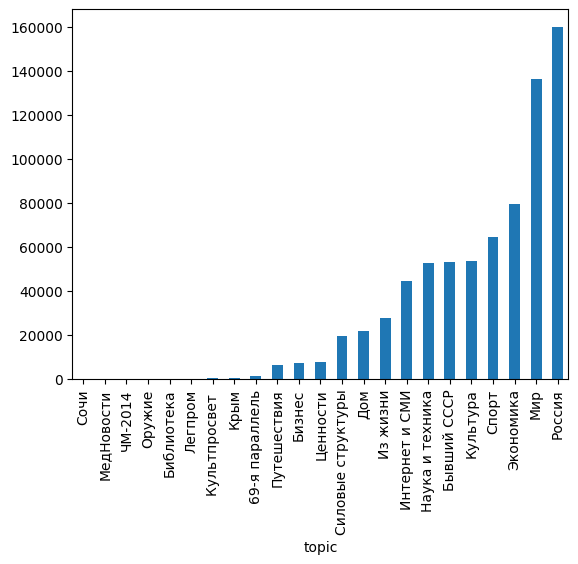

In [31]:
df['topic'].value_counts().sort_values().plot(kind='bar')


In [32]:
vc = df['topic'].value_counts()
threshold = int(0.005 * df.shape[0])
rare_labels = vc[vc < threshold].index
df = df[~df['topic'].isin(rare_labels)]

In [33]:
df

,url,title,text,topic,date,title_clean,text_clean
5,https://lenta.ru/news/1999/08/31/stancia_mir/,"Космонавты сомневаются в надежности ""Мира""",Как стало известно агентству Ассошиэйтед Пресс...,Россия,1999-08-31,космонавты сомневаются в надежности мира,как стало известно агентству ассошиэйтед пресс...
6,https://lenta.ru/news/1999/08/31/vzriv/,Взрыв в центре Москвы: пострадало 30 человек,В зале игровых автоматов в третьем ярусе подзе...,Россия,1999-08-31,взрыв в центре москвы пострадало человек,в зале игровых автоматов в третьем ярусе подзе...
7,https://lenta.ru/news/1999/08/31/credit_japs/,Япония кредитует Россию на полтора миллиарда д...,Япония приняла решение разморозить кредиты Рос...,Россия,1999-08-31,япония кредитует россию на полтора миллиарда д...,япония приняла решение разморозить кредиты рос...
8,https://lenta.ru/news/1999/08/31/diana/,Британцы отмечают двухлетие смерти Дианы,Британцы отмечают сегодня скорбную дату - втор...,Мир,1999-08-31,британцы отмечают двухлетие смерти дианы,британцы отмечают сегодня скорбную дату вторую...
9,https://lenta.ru/news/1999/08/31/mvf/,Отмытые через Bank of NY деньги не имели отнош...,В понедельник директор департамента внешних св...,Россия,1999-08-31,отмытые через деньги не имели отношения к мвф,в понедельник директор департамента внешних св...
...,...,...,...,...,...,...,...
739171,https://lenta.ru/news/2018/12/15/gasinparis/,«Желтые жилеты» прорвали кордон полиции под «М...,Протесты движения «желтых жилетов» в Париже сн...,Мир,2018-12-15,желтые жилеты прорвали кордон полиции под мар...,протесты движения желтых жилетов в париже снов...
739172,https://lenta.ru/news/2018/12/15/su27/,Су-27 разбился на Украине,Истребитель Су-27 разбился в Житомирской облас...,Бывший СССР,2018-12-15,су разбился на украине,истребитель су разбился в житомирской области ...
739173,https://lenta.ru/news/2018/12/15/spb/,В Петербурге нашли квартиру из 58 комнат,В Московском районе Санкт-Петербурга на продаж...,Дом,2018-12-15,в петербурге нашли квартиру из комнат,в московском районе санкт петербурга на продаж...
739174,https://lenta.ru/news/2018/12/15/gizin/,Падение горнолыжника на полной скорости попало...,Швейцарский горнолыжник Марк Гизин неудачно пр...,Спорт,2018-12-15,падение горнолыжника на полной скорости попало...,швейцарский горнолыжник марк гизин неудачно пр...


<Axes: xlabel='topic'>

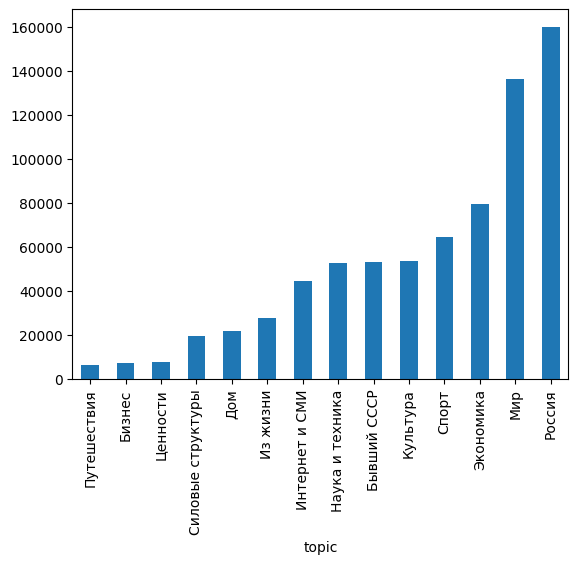

In [34]:
df['topic'].value_counts().sort_values().plot(kind='bar')

In [35]:
df.head()

,url,title,text,topic,date,title_clean,text_clean
5,https://lenta.ru/news/1999/08/31/stancia_mir/,"Космонавты сомневаются в надежности ""Мира""",Как стало известно агентству Ассошиэйтед Пресс...,Россия,1999-08-31,космонавты сомневаются в надежности мира,как стало известно агентству ассошиэйтед пресс...
6,https://lenta.ru/news/1999/08/31/vzriv/,Взрыв в центре Москвы: пострадало 30 человек,В зале игровых автоматов в третьем ярусе подзе...,Россия,1999-08-31,взрыв в центре москвы пострадало человек,в зале игровых автоматов в третьем ярусе подзе...
7,https://lenta.ru/news/1999/08/31/credit_japs/,Япония кредитует Россию на полтора миллиарда д...,Япония приняла решение разморозить кредиты Рос...,Россия,1999-08-31,япония кредитует россию на полтора миллиарда д...,япония приняла решение разморозить кредиты рос...
8,https://lenta.ru/news/1999/08/31/diana/,Британцы отмечают двухлетие смерти Дианы,Британцы отмечают сегодня скорбную дату - втор...,Мир,1999-08-31,британцы отмечают двухлетие смерти дианы,британцы отмечают сегодня скорбную дату вторую...
9,https://lenta.ru/news/1999/08/31/mvf/,Отмытые через Bank of NY деньги не имели отнош...,В понедельник директор департамента внешних св...,Россия,1999-08-31,отмытые через деньги не имели отношения к мвф,в понедельник директор департамента внешних св...


In [42]:
import spacy

nlp = spacy.load(
    "ru_core_news_sm",
    disable=["parser", "ner", "attribute_ruler", "tok2vec"]
)

texts = df['text_clean'].tolist()
titles = df['title_clean'].tolist()

docs_text = nlp.pipe(texts, batch_size=50000, n_process=5)
docs_title = nlp.pipe(titles, batch_size=50000, n_process=5)


In [ ]:
from tqdm.auto import tqdm

def spacy_tokenize(doc):
    return [tok.lemma_ for tok in doc if tok.is_alpha and not tok.is_stop]

df['title_clean'] = [spacy_tokenize(doc) for doc in tqdm(docs_title, total=len(titles), desc="Tokenizing titles")]
df['text_clean'] = [spacy_tokenize(doc) for doc in tqdm(docs_text, total=len(texts), desc="Tokenizing texts")]

In [ ]:
texts = df['text_clean'].tolist()

docs_text = nlp.pipe(texts, batch_size=5000, n_process=5)

df['text_tokens'] = [spacy_tokenize(doc) for doc in tqdm(docs_text, total=len(texts), desc="Tokenizing texts")]

In [48]:
df.head()

,url,title,text,topic,date,title_clean,text_clean,title_tokens,text_tokens
5,https://lenta.ru/news/1999/08/31/stancia_mir/,"Космонавты сомневаются в надежности ""Мира""",Как стало известно агентству Ассошиэйтед Пресс...,Россия,1999-08-31,космонавты сомневаются в надежности мира,как стало известно агентству ассошиэйтед пресс...,"[космонавты, сомневаются, надежности, мира]","[известно, агентству, ассошиэйтед, пресс, экип..."
6,https://lenta.ru/news/1999/08/31/vzriv/,Взрыв в центре Москвы: пострадало 30 человек,В зале игровых автоматов в третьем ярусе подзе...,Россия,1999-08-31,взрыв в центре москвы пострадало человек,в зале игровых автоматов в третьем ярусе подзе...,"[взрыв, центре, москвы, пострадало, человек]","[зале, игровых, автоматов, третьем, ярусе, под..."
7,https://lenta.ru/news/1999/08/31/credit_japs/,Япония кредитует Россию на полтора миллиарда д...,Япония приняла решение разморозить кредиты Рос...,Россия,1999-08-31,япония кредитует россию на полтора миллиарда д...,япония приняла решение разморозить кредиты рос...,"[япония, кредитует, россию, полтора, миллиарда...","[япония, приняла, решение, разморозить, кредит..."
8,https://lenta.ru/news/1999/08/31/diana/,Британцы отмечают двухлетие смерти Дианы,Британцы отмечают сегодня скорбную дату - втор...,Мир,1999-08-31,британцы отмечают двухлетие смерти дианы,британцы отмечают сегодня скорбную дату вторую...,"[британцы, отмечают, двухлетие, смерти, дианы]","[британцы, отмечают, сегодня, скорбную, дату, ..."
9,https://lenta.ru/news/1999/08/31/mvf/,Отмытые через Bank of NY деньги не имели отнош...,В понедельник директор департамента внешних св...,Россия,1999-08-31,отмытые через деньги не имели отношения к мвф,в понедельник директор департамента внешних св...,"[отмытые, деньги, имели, отношения, мвф]","[понедельник, директор, департамента, внешних,..."


In [49]:
df.to_csv('../data/preprocessed.csv', index=False)